In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
img2 = cv2.imread('images/13.jpg', cv2.IMREAD_GRAYSCALE)
img_90 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
img_180 = cv2.rotate(img2, cv2.ROTATE_180)
img_270 = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [18]:
sift = cv2.SIFT_create()


kp2, des2 = sift.detectAndCompute(img2, None)
kp90, des90 = sift.detectAndCompute(img_90, None)
kp180, des180 = sift.detectAndCompute(img_180, None)
kp270, des270 = sift.detectAndCompute(img_270, None)

In [19]:
print(f"تعداد نقاط یافت شده در تصویر دوم: {len(kp2)}")
print(f"تعداد نقاط یافت شده در چرخش 90 درجه: {len(kp90)}")
print(f"تعداد نقاط یافت شده در چرخش 180 درجه: {len(kp180)}")
print(f"تعداد نقاط یافت شده در چرخش 270 درجه: {len(kp270)}")

تعداد نقاط یافت شده در تصویر دوم: 1616
تعداد نقاط یافت شده در چرخش 90 درجه: 1579
تعداد نقاط یافت شده در چرخش 180 درجه: 1588
تعداد نقاط یافت شده در چرخش 270 درجه: 1610


In [20]:
kp2_sorted = sorted(kp2, key=lambda x: x.response, reverse=True)[:50]
kp90_sorted = sorted(kp90, key=lambda x: x.response, reverse=True)[:50]
kp180_sorted = sorted(kp180, key=lambda x: x.response, reverse=True)[:50]
kp270_sorted = sorted(kp270, key=lambda x: x.response, reverse=True)[:50]

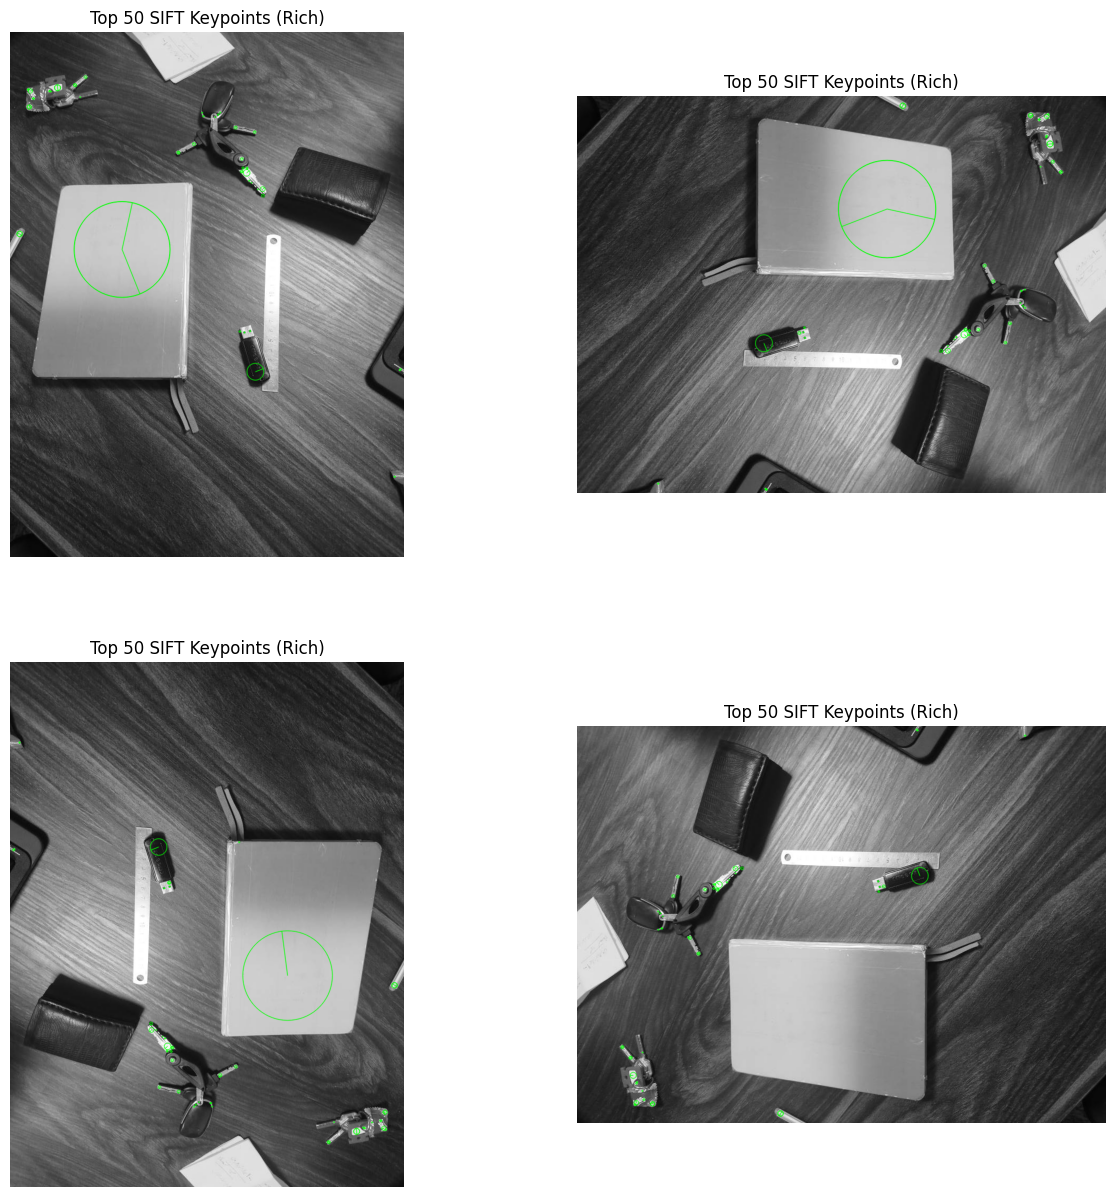

In [21]:
img2_kp = cv2.drawKeypoints(img2, kp2_sorted, None, color=(0, 255, 0),
                            flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

img90_kp = cv2.drawKeypoints(img_90, kp90_sorted, None, color=(0, 255, 0),
                            flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

img180_kp = cv2.drawKeypoints(img_180, kp180_sorted, None, color=(0, 255, 0),
                            flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

img270_kp = cv2.drawKeypoints(img_270, kp270_sorted, None, color=(0, 255, 0),
                            flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(img2_kp)
plt.title('Top 50 SIFT Keypoints (Rich)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img90_kp)
plt.title('Top 50 SIFT Keypoints (Rich)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img180_kp)
plt.title('Top 50 SIFT Keypoints (Rich)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img270_kp)
plt.title('Top 50 SIFT Keypoints (Rich)')
plt.axis('off')

plt.show()

In [22]:
bf = cv2.BFMatcher(cv2.NORM_L2)

def match_and_filter(des1, des2, ratio=0.75):
    matches = bf.knnMatch(des1, des2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)
    return good_matches

In [23]:
good_90 = match_and_filter(des2, des90)
good_180 = match_and_filter(des2, des180)
good_270 = match_and_filter(des2, des270)

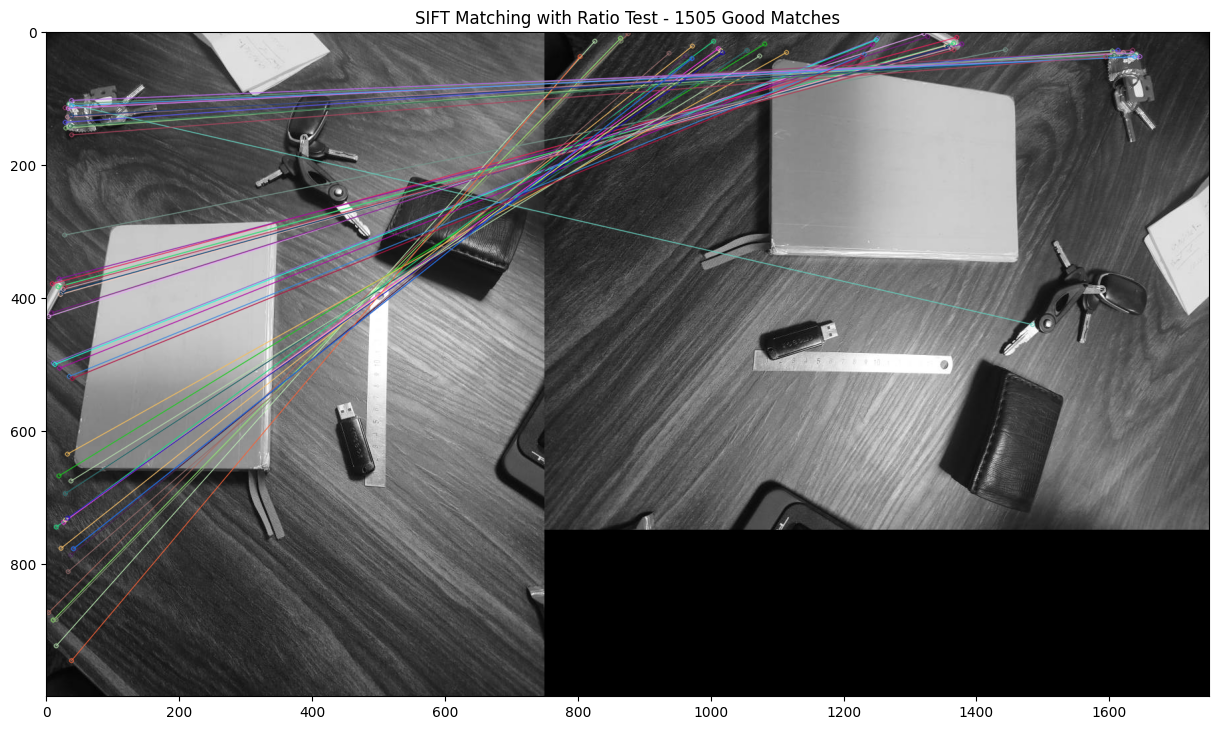

In [24]:
img_result = cv2.drawMatches(img2, kp2, img_90, kp90, good_90[:50], None, 
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(img_result)
plt.title(f"SIFT Matching with Ratio Test - {len(good_90)} Good Matches")
plt.show()

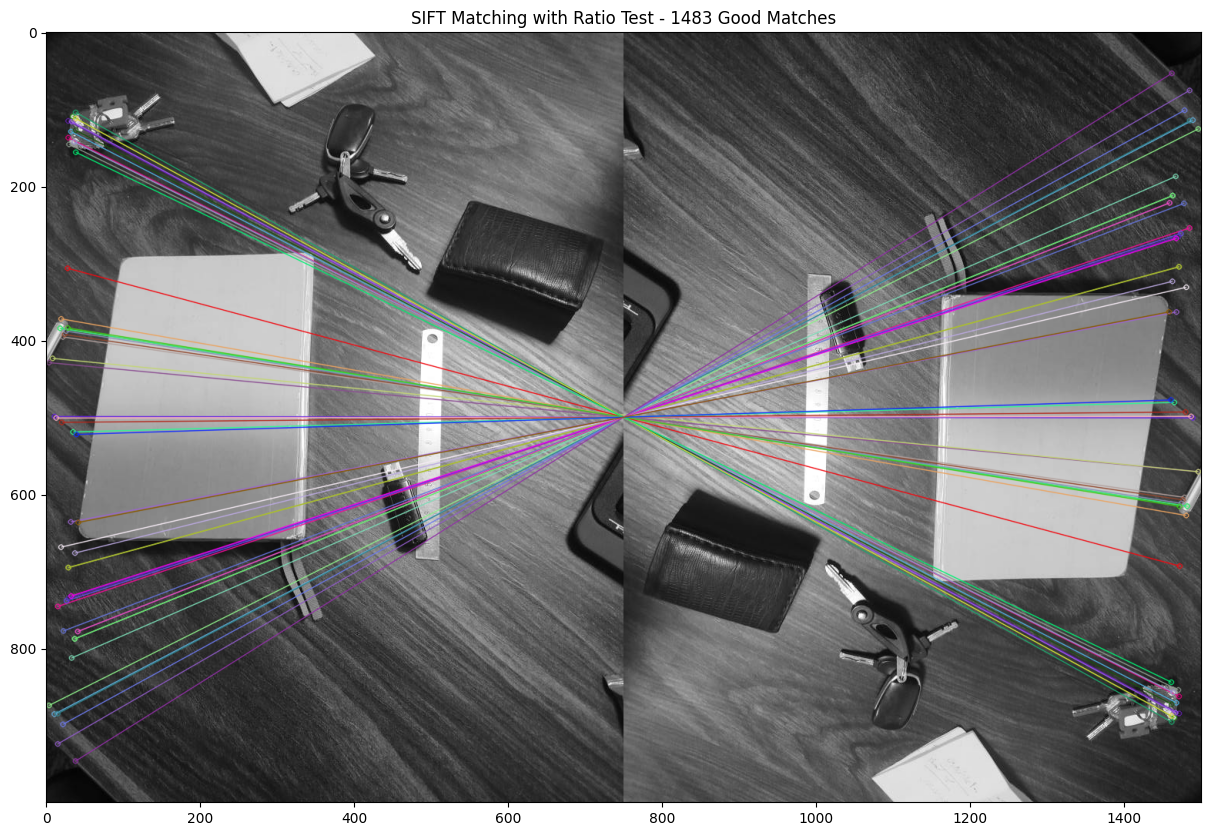

In [25]:
img_result = cv2.drawMatches(img2, kp2, img_180, kp180, good_180[:50], None, 
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(img_result)
plt.title(f"SIFT Matching with Ratio Test - {len(good_180)} Good Matches")
plt.show()

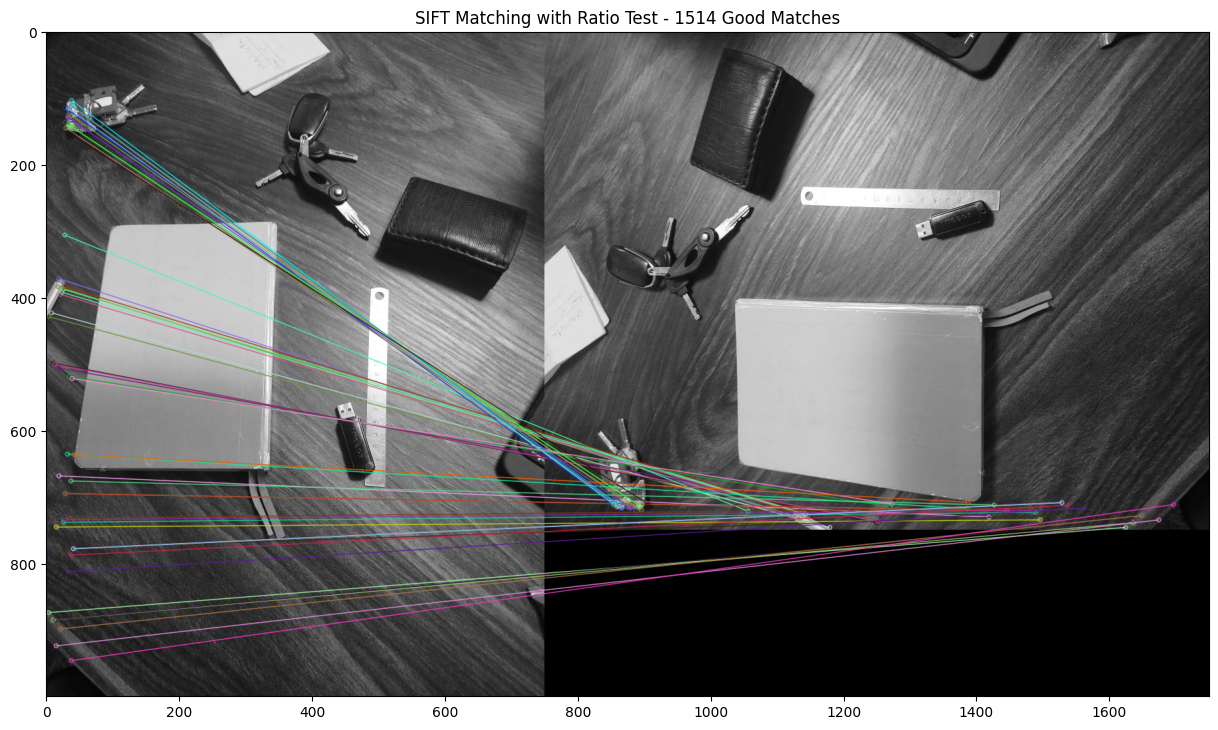

In [26]:
img_result = cv2.drawMatches(img2, kp2, img_270, kp270, good_270[:50], None, 
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(img_result)
plt.title(f"SIFT Matching with Ratio Test - {len(good_270)} Good Matches")
plt.show()

همانطور که مشخص از چرخش تاثیر خاصی در در تعداد تطبیق ها نداشته